In [71]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [54]:
# scenario
fs = "Messel"
snf_path = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/03-28/mitteldeutschland/180m/snf_stored.csv"
nc_path = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/03-28/mitteldeutschland/180m/nc_stored.csv"

In [55]:
fs = "Gorleben_CISF"
snf_path = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/03-28/norddeutschland/180m/snf_stored.csv"
nc_path = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/03-28/norddeutschland/180m/nc_stored.csv"

In [56]:
fs = "Saldenberg"
snf_path = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/03-28/süddeutschland/180m/snf_stored.csv"
nc_path = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/03-28/süddeutschland/180m/nc_stored.csv"

In [57]:
fs = "no_fs"
snf_path = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/03-28/no_final_storage/180m/snf_stored.csv"
nc_path = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/03-28/no_final_storage/180m/nc_stored.csv"

In [58]:
snf_init = pd.read_excel("/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/ExtendedNuclearData.xlsx", sheet_name="Reactors")
snf_init

,name,snf,capacity,costs
0,Ahaus,56,370,2000
1,Brokdorf,50,100,2000
2,Gorleben,113,420,2000
3,Brunsbüttel,24,20,2000
4,Biblis,108,135,2000
5,Grafenrheinfeld,54,88,2000
6,Grohnde,51,100,2000
7,Grundemmingen,127,192,2000
8,Isar,88,152,2000
9,Lingen,47,125,2000


In [59]:
snf_stored = pd.read_csv(snf_path)

In [60]:
init_values = []
for row in snf_init.iterrows():
    init_values.append({"node": row[1]["name"],
                       "year": 2029,
                       "SNF": row[1]["snf"]})
snf_stored = pd.concat([snf_stored, pd.DataFrame(init_values)], ignore_index=True)
#snf_stored = snf_stored[snf_stored.SNF > 0]
snf_stored

,node,year,SNF
0,Grohnde,2030,51.0
1,Grohnde,2031,48.0
2,Grohnde,2032,46.0
3,Grohnde,2033,44.0
4,Grohnde,2034,42.0
...,...,...,...
1900,Krümmel,2029,42.0
1901,Neckarwestheim,2029,99.0
1902,Philippsburg,2029,102.0
1903,Unterweser,2029,40.0


In [61]:
snf_stored[snf_stored.year == 2050]

,node,year,SNF
20,Grohnde,2050,0.0
90,Isar,2050,0.0
160,Kaiseresch,2050,0.0
230,Grundemmingen,2050,0.0
300,Stade,2050,0.0
370,Unterweser,2050,0.0
440,Krümmel,2050,0.0
510,Hot Cell 2,2050,0.0
580,Ahaus_CISF,2050,157.0
650,Grafenrheinfeld,2050,0.0


In [62]:
nc_stored = pd.read_csv(nc_path)
nc_stored

,node,year,NC
0,Grohnde,2030,0.0
1,Grohnde,2031,30.0
2,Grohnde,2032,54.0
3,Grohnde,2033,56.0
4,Grohnde,2034,58.0
...,...,...,...
1885,Gorleben,2095,0.0
1886,Gorleben,2096,0.0
1887,Gorleben,2097,0.0
1888,Gorleben,2098,0.0


In [63]:
# coords
isf_coords = {"Gorleben": (53.033344625111255, 11.341597461918763),
              "Ahaus": (52.075884172859716, 7.056252098203471),
              "Brokdorf": (53.85053568702555, 9.345557443628627),
              "Brunsbüttel": (53.891632640377, 9.20050890913132),
              "Biblis": (49.70830596704328, 8.411540078513102),
              "Grafenrheinfeld": (49.98379398601132, 10.1866276073602),
              "Grohnde": (52.03567047221345, 9.41068601909146),
              "Grundemmingen": (48.51666979391695, 10.403076045930131),
              "Isar": (48.6075745368956, 12.291958334289768),
              "Lingen": (52.47033938642687, 7.321564619110349),
              "Krümmel": (53.410146129098514, 10.410102309356501),
              "Neckarwestheim": (49.0420294948931, 9.173420061294042),
              "Philippsburg": (49.25285028023963, 8.441867563151883),
              "Unterweser": (53.430121612826966, 8.476324972847728),
              "Lubmin": (54.14141668772474, 13.677069821066244)}

cisf_names = ['Oberdachstetten', 'Kaiseresch', 'Stade', 'Hann. Münden', 'Crivitz', 'Gardelegen', 'Arnstadt', 'Kuchen']
cisf_coords = [(49.41887922, 10.42371430), (50.22679584,7.13714757), (53.59721036,9.45195604), 
(51.41175438, 9.65999936), (53.57227292, 11.64393809), (52.51810692, 11.40461218), (50.83101325, 10.95047937), (48.64054772, 9.802936604)]
cisf_coords = {k:v for k, v in zip(cisf_names, cisf_coords)}
cisf_coords['Gorleben_CISF'] = isf_coords['Gorleben']
cisf_coords['Ahaus_CISF'] = isf_coords['Ahaus']

fsf_coords = {"Saldenberg": (48.77298963391,13.35212619416),
              "Gorleben_Endlager": (53.033344625111255, 11.341597461918763),
              "Messel": (49.93831226, 8.749268672)}
coords = isf_coords | cisf_coords | fsf_coords

In [64]:
snf_sizes = [snf_stored[(snf_stored.year == 2035) & (snf_stored.node == n)]["SNF"].values[0] if n in snf_stored.node.unique() else 0 for n in coords.keys()]
nc_sizes = [nc_stored[(nc_stored.year == 2035) & (nc_stored.node == n)]["NC"].values[0] if n in nc_stored.node.unique() else 0 for n in coords.keys()]
marker_sizes = [x+y for x,y in zip(snf_sizes, nc_sizes)]

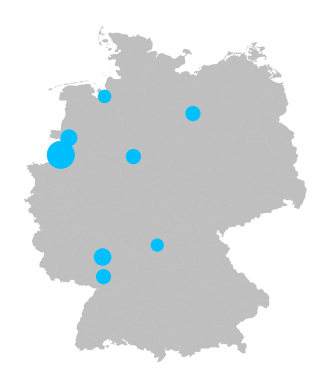

In [65]:
row_list = []
for n, c in coords.items():
    d = {}
    d["name"] = n
    d["latitude"] = c[0]
    d["longitude"] = c[1]
    row_list.append(d)

coords_df = pd.DataFrame(row_list)

geometry = [Point(xy) for xy in zip(coords_df['longitude'], coords_df['latitude'])]
gdf = GeoDataFrame(coords_df, geometry=geometry)
ger = gpd.read_file("/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/vg2500_geo84/vg2500_krs.shp")

isf_ax = gdf[gdf.name.isin(coords.keys())].plot(aspect=1.4, ax=ger.plot(color="black", alpha=0.25, label="ISF"),
         c="deepskyblue", 
         markersize=marker_sizes, label="ISF")

if fs != "no_fs":
    gdf[gdf.name == fs].plot(aspect=1.4, ax=isf_ax, marker="*", alpha=0.75,
            c="teal", 
            markersize=50, label="FSF", legend=True)
isf_ax.set_axis_off()
plt.savefig(f"/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/03-28/{fs}-34.png")

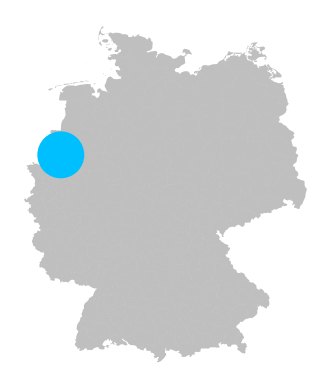

In [66]:
snf_sizes = [snf_stored[(snf_stored.year == 2050) & (snf_stored.node == n)]["SNF"].values[0] if n in snf_stored.node.unique() else 0 for n in coords.keys()]
nc_sizes = [nc_stored[(nc_stored.year == 2050) & (nc_stored.node == n)]["NC"].values[0] if n in nc_stored.node.unique() else 0 for n in coords.keys()]
marker_sizes = [x+y for x,y in zip(snf_sizes, nc_sizes)]

row_list = []
for n, c in coords.items():
    d = {}
    d["name"] = n
    d["latitude"] = c[0]
    d["longitude"] = c[1]
    row_list.append(d)

coords_df = pd.DataFrame(row_list)

geometry = [Point(xy) for xy in zip(coords_df['longitude'], coords_df['latitude'])]
gdf = GeoDataFrame(coords_df, geometry=geometry)
ger = gpd.read_file("/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/vg2500_geo84/vg2500_krs.shp")

isf_ax = gdf[gdf.name.isin(coords.keys())].plot(aspect=1.4, ax=ger.plot(color="black", alpha=0.25, label="ISF"),
         c="deepskyblue", 
         markersize=marker_sizes, label="ISF")

if fs != "no_fs":
    gdf[gdf.name == fs].plot(aspect=1.4, ax=isf_ax, marker="*", alpha=0.75,
            c="teal", 
            markersize=50, label="FSF", legend=True)
isf_ax.set_axis_off()
plt.savefig(f"/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/03-28/{fs}-50.png")

In [67]:
row_list = []
for n, c in coords.items():
    d = {}
    d["name"] = n
    d["latitude"] = c[0]
    d["longitude"] = c[1]
    row_list.append(d)

coords_df = pd.DataFrame(row_list)


In [68]:
geometry = [Point(xy) for xy in zip(coords_df['longitude'], coords_df['latitude'])]
gdf = GeoDataFrame(coords_df, geometry=geometry)
ger = gpd.read_file("/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/vg2500_geo84/vg2500_krs.shp")

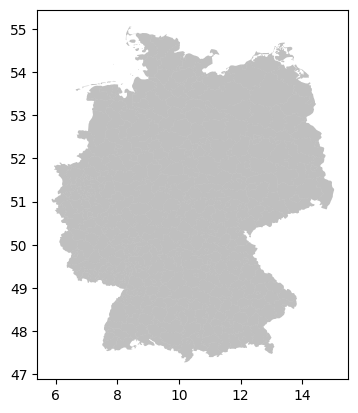

In [69]:
isf_ax = gdf[gdf.name.isin(isf_coords.keys())].plot(aspect=1.4, ax=ger.plot(color="black", alpha=0.25, label="ISF"),
         c="deepskyblue", 
         markersize=marker_sizes, label="ISF")